## Import Modules

In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Activations
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
import matplotlib.gridspec as gridspec
import pandas as pd

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1193917719670980967
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1408043828
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3057674713171968711
physical_device_desc: "device: 0, name: GeForce MX330, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


## Loading the dataset

In [3]:
def get_images(directory):
    Images = []
    Labels = []
    label = 0
    
    for labels in os.listdir(directory):
        if labels == "NORMAL":
            label = 0
        elif labels == "PNEUMONIA":
            label = 1
        
        for image_file in os.listdir(directory+labels):
            image = cv2.imread(directory + labels + '/' + image_file)
                        
            image = cv2.resize(image, (240, 240))
    
                
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            Images.append(image)
            Labels.append(label)
            
    return shuffle(Images, Labels, random_state=12042021)

def get_class_label(classcode):
    labels = {0: "NORMAL" , 1: "PNEUMONIA"}
    
    return labels[classcode]
        

In [4]:
Images, Labels = get_images('./train/')

In [5]:
Images = np.array(Images)
Labels = np.array(Labels)

In [6]:
Images_val, Labels_val = get_images('./val/')

In [7]:
Images_val = np.array(Images_val)
Labels_val = np.array(Labels_val)

In [8]:
Images.shape

(5216, 240, 240)

In [9]:
Images_val[0].shape

(240, 240)

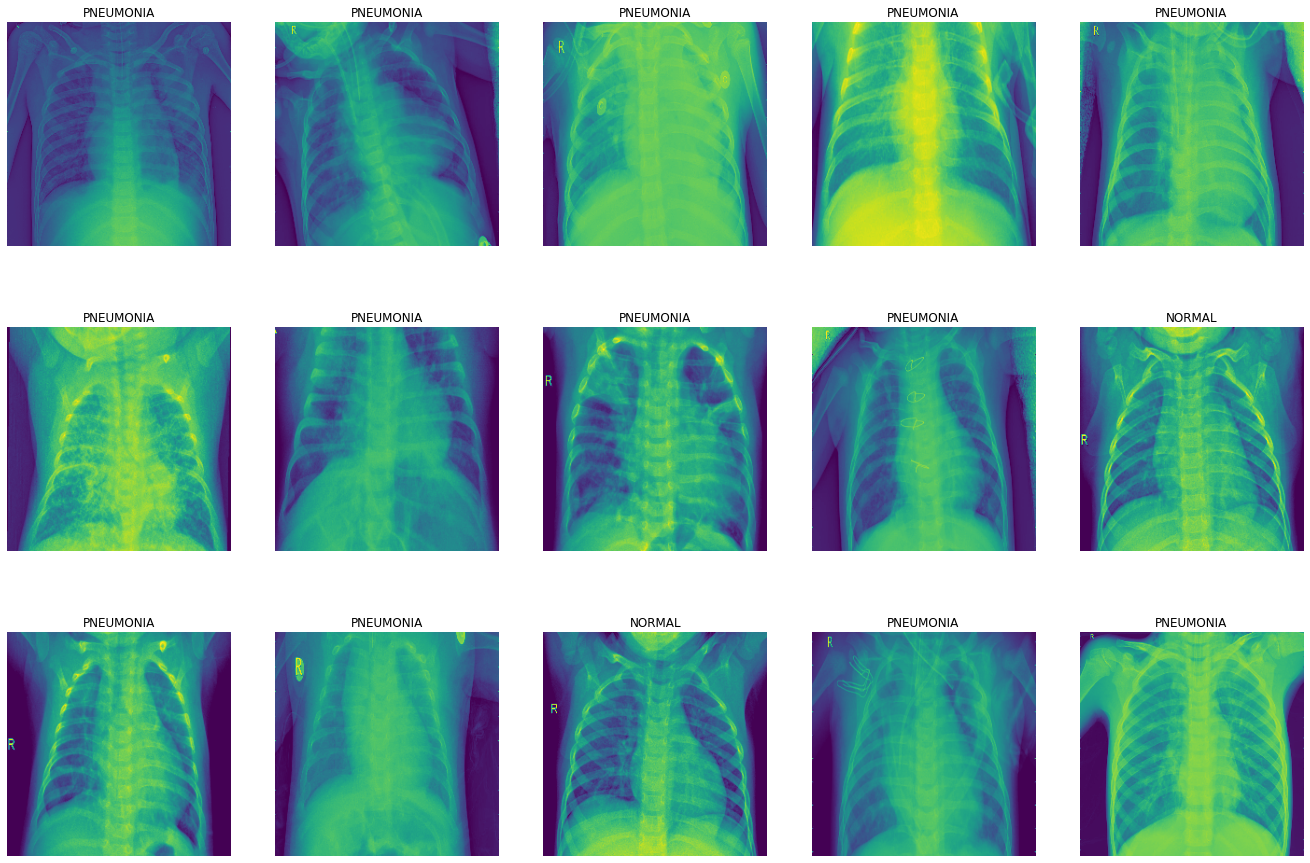

In [10]:
f,ax = plt.subplots(3,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,3,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_class_label(Labels[rnd_number]))
        ax[i,j].axis('off')

In [11]:
import tensorflow as tf

tf.config.experimental.list_physical_devices(device_type="GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
from tensorflow.python.client import device_lib
tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce MX330, pci bus id: 0000:01:00.0, compute capability: 6.1



In [13]:
Images = Images.reshape(Images.shape[0], Images.shape[1], Images.shape[2], 1)

In [14]:
Images_val = Images_val.reshape(Images_val.shape[0], Images_val.shape[1], Images_val.shape[2], 1)

## Model Training

In [15]:
model = Models.Sequential()
model.add(Layers.Conv2D(32, 3, activation='relu', input_shape=(240, 240, 1)))
model.add(Layers.MaxPooling2D(2,2))
model.add(Layers.Conv2D(32, 3, activation='relu'))
model.add(Layers.MaxPooling2D(2,2))
model.add(Layers.Flatten())
model.add(Layers.Dense(100, activation='relu'))
model.add(Layers.Dropout(0.5))
model.add(Layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 107648)            0         
_________________________________________________________________
dense (Dense)                (None, 100)               10764900  
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [17]:
model.fit(Images, Labels, validation_data=(Images_val, Labels_val), epochs=10)

Epoch 1/10
163/163 [==============================] - 138s 829ms/step - loss: 38.9683 - accuracy: 0.7954 - val_loss: 0.4208 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 146s 897ms/step - loss: 0.2300 - accuracy: 0.9175 - val_loss: 0.1522 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 146s 897ms/step - loss: 0.1120 - accuracy: 0.9546 - val_loss: 0.1700 - val_accuracy: 0.9375
Epoch 4/10
163/163 [==============================] - 147s 899ms/step - loss: 0.0643 - accuracy: 0.9781 - val_loss: 0.3576 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 147s 899ms/step - loss: 0.0932 - accuracy: 0.9739 - val_loss: 0.2566 - val_accuracy: 0.9375
Epoch 6/10
163/163 [==============================] - 146s 898ms/step - loss: 0.0744 - accuracy: 0.9782 - val_loss: 0.5093 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 146s 896ms/step - loss: 0.1630 - accuracy: 0.9529 - val_loss: 0.2469 

In [18]:
Images_test, Labels_test = get_images('./test/')

In [19]:
Images_test = np.array(Images_test)
Labels_test = np.array(Labels_test)

In [20]:
Images_test = Images_test.reshape(Images_test.shape[0], Images_test.shape[1], Images_test.shape[2], 1)

In [21]:
model.evaluate(Images_test, Labels_test)[1]*100

20/20 [==============================] - 7s 340ms/step - loss: 2.7746 - accuracy: 0.7388


73.87820482254028

In [22]:
Labels_pred = model.predict(Images_test)
# confusion_matrix(validation_generator.classes, y_pred)

In [23]:
Labels_test

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [24]:
Labels_pred[:,0].astype(int)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,

In [26]:
CM(Labels_test, Labels_pred[:,0].astype(int))

array([[205,  29],
       [126, 264]], dtype=int64)